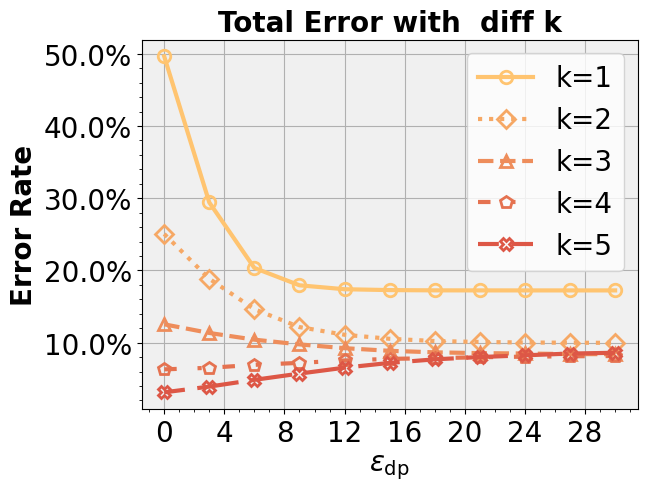

eps_figs\eps_eps_diff_k_Random.pdf


<Figure size 640x480 with 0 Axes>

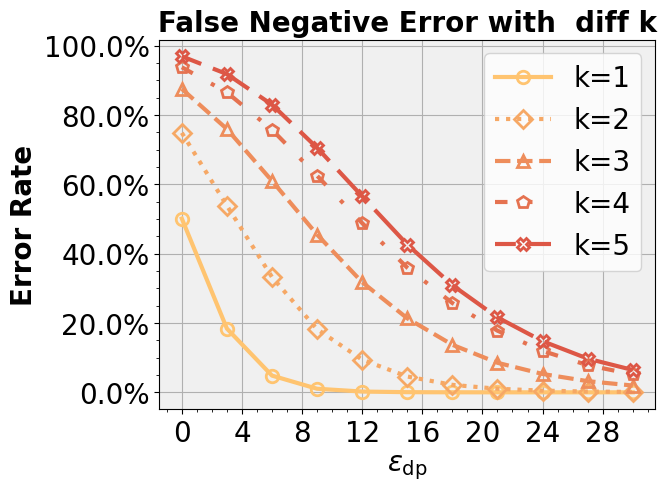

eps_figs\eps_eps_diff_k_False_Negative.pdf


<Figure size 640x480 with 0 Axes>

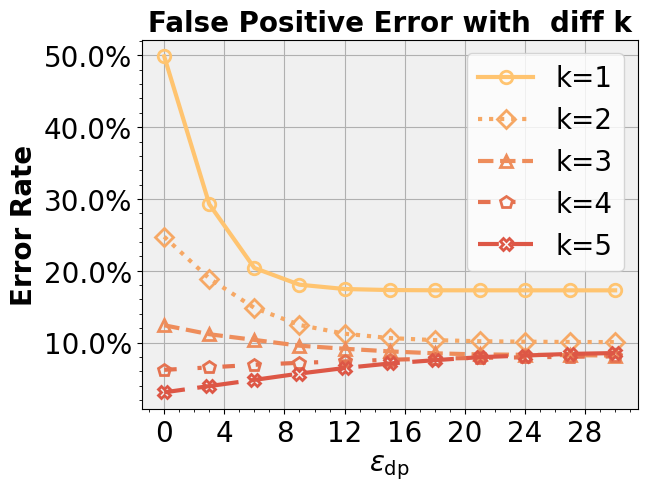

eps_figs\eps_eps_diff_k_False_Positive.pdf


<Figure size 640x480 with 0 Axes>

In [1]:
import matplotlib.pyplot as plt
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import ticker


log_data_base_dir="..\\log_data"

target_key_mapping = {
    "random" : "Random",
    "inside" : "False_Negative",
    "outside" : "False_Positive"
}

title_mapping = {
    "random" : "Total Error",
    "inside" : "False Negative Error",
    "outside" : "False Positive Error"
}

# # if you draw figures for different m, uncomment the following code
# log2m_values = [18, 19, 20, 21, 22]
# name="eps_diff_m"
# lengend_name = "logm"
# key_list = log2m_values

# # if you draw figures for different na, uncomment the following code
# na_values = ["1e1", "1e2", "1e3", "1e4", "1e5"]
# name="eps_diff_na"
# lengend_name="|A|"
# key_list = na_values

# By default, we draw figures for different k
k_values = [1, 2, 3, 4, 5]
name="eps_diff_k"
lengend_name="k"
key_list = k_values

eps_values = [int(i * 3) for i in range(11)]

font_size = 20
line_width=3.0
color_list = ["#ffc470", "#f6a865", "#ee8d5b", "#e57250", "#dd5746"]
marker_list = ["o", "D", "^", "p", "X"]
line_style_dict = {
    "solid" : "solid",
    "dotted" : "dotted",
    "dashed" : "dashed",
    "dashdot" : "dashdot",
    'long dash with offset': (5, (10, 3)), 
    'dashdotted' : (0, (3, 5, 1, 5)),
}
line_style_list = ["solid", "dotted", "dashed", 'dashdotted', 'long dash with offset']


def gen_single_pdf(target_key):
    log2m=19
    na="1e5"
    k=3

    save_file_name=f"eps_{name}_{target_key_mapping[target_key]}.pdf"
    title_name = f"{title_mapping[target_key]} with {name.replace('_', ' ').replace('na', '|A|').replace('eps', '')}"

    log_data_dir=os.path.join(log_data_base_dir, name)

    diff_value2list_dict = {}

    for dict_key in key_list:
        if name == "eps_diff_k":
            k = dict_key
        elif name == "eps_diff_m":
            log2m = dict_key
        elif name == "eps_diff_na":
            na = dict_key
        else:
            raise f"unknow name {name}"
        value_list = []

        for eps in eps_values:
            file_name = f"log2m_{log2m}_na_{na}_k_{k}_eps_{eps}.json"
            file_path = os.path.join(log_data_dir, file_name)
            with open(file_path, 'r') as fr:
                data = json.load(fr)
                value_list.append(data[target_key])
        # post process value list
        value_list = [value / 100 for value in value_list]
        diff_value2list_dict[dict_key] = value_list

    # create a new figure
    plt.figure()
    # get current axis
    ax = plt.gca()
    # turn background into lightgrey
    ax.set_facecolor('#f0f0f0')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

    x_data = eps_values
    for i, key in enumerate(key_list):
        y_data = diff_value2list_dict[key]
        plt.plot(x_data, y_data, label=f"{lengend_name}={key}", marker=marker_list[i], color=color_list[i], linewidth=line_width, markersize=9, markerfacecolor="None",
            markeredgecolor=color_list[i], markeredgewidth=2, linestyle=line_style_dict[line_style_list[i]])

    plt.grid(True)  # show grid
    # add legend
    plt.legend(fontsize=font_size)

    # add title and labels for x and y
    plt.title(title_name, fontsize=font_size, fontweight='bold')
    plt.xlabel(r'$\epsilon_{\mathrm{dp}}$', fontsize=font_size, fontweight='bold')
    plt.ylabel('Error Rate', fontsize=font_size, fontweight='bold')

    plt.minorticks_on()

    # set stick font size
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    # # if you want to dispaly the figure, uncomment the following code
    # plt.show()

    # By default, we save the figure as PDFs
    save_fig_path = os.path.join("eps_figs", save_file_name)
    print(save_fig_path)
    plt.savefig(save_fig_path, format='pdf', bbox_inches='tight', pad_inches=0.05)

    # clean up plt
    plt.clf()


target_key_values = ["random", "inside", "outside"]
for target_key in target_key_values:
    gen_single_pdf(target_key)
